In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [7]:
df=pd.read_csv('../Thyroid Detection//dataset.csv')

In [8]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [9]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [10]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

We do not need any scaling as all are categorical except one 

In [11]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

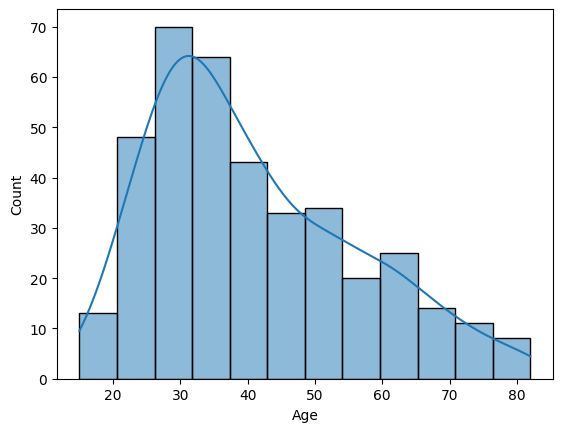

In [12]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Gender', ylabel='count'>

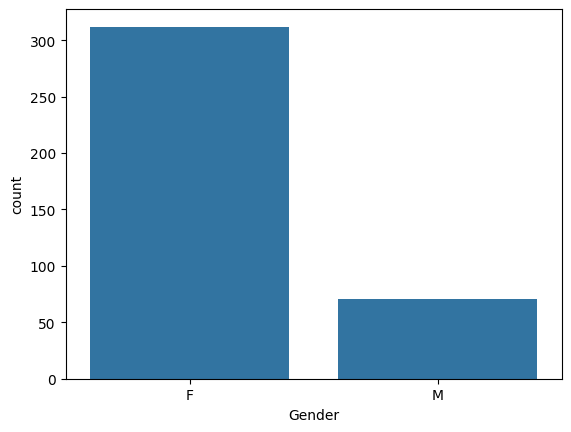

In [13]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Smoking', ylabel='count'>

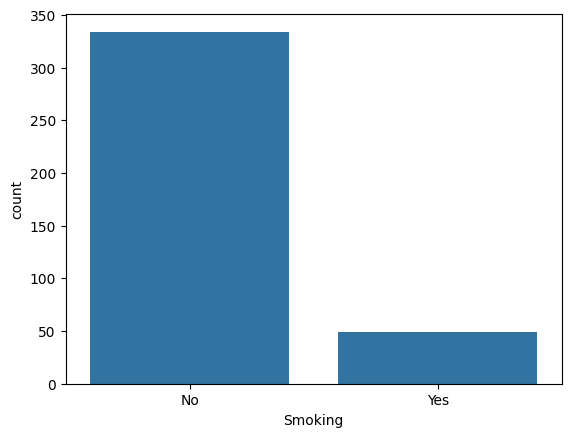

In [14]:
sns.countplot(x='Smoking',data=df)

<Axes: xlabel='Hx Smoking', ylabel='count'>

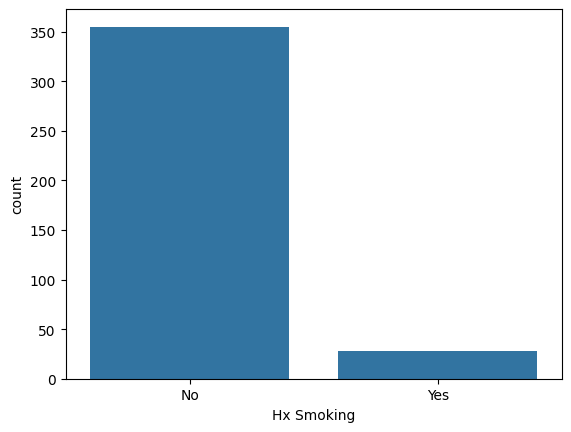

In [15]:
sns.countplot(x='Hx Smoking',data=df)

<Axes: xlabel='Hx Radiothreapy', ylabel='count'>

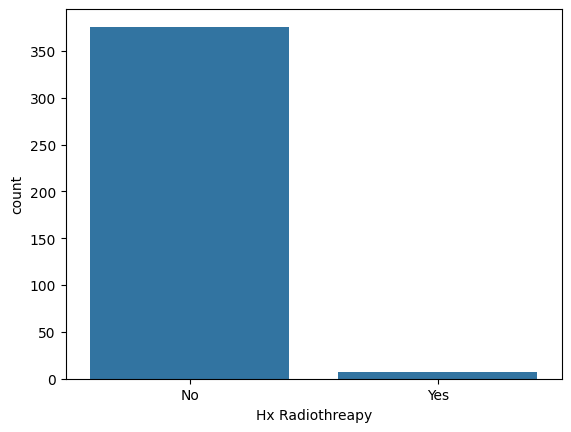

In [16]:
sns.countplot(x='Hx Radiothreapy',data=df)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Euthyroid'),
  Text(1, 0, 'Clinical Hyperthyroidism'),
  Text(2, 0, 'Clinical Hypothyroidism'),
  Text(3, 0, 'Subclinical Hyperthyroidism'),
  Text(4, 0, 'Subclinical Hypothyroidism')])

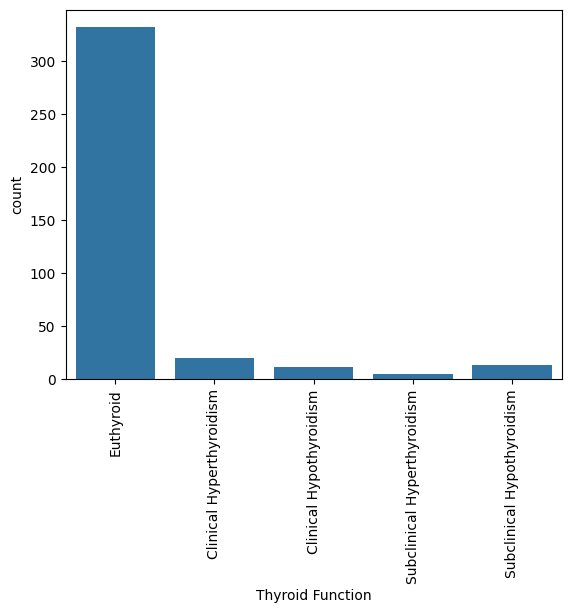

In [17]:
sns.countplot(x='Thyroid Function',data=df)
plt.xticks(rotation=90)

Euthyroid seems to be most common

<Axes: xlabel='Adenopathy', ylabel='count'>

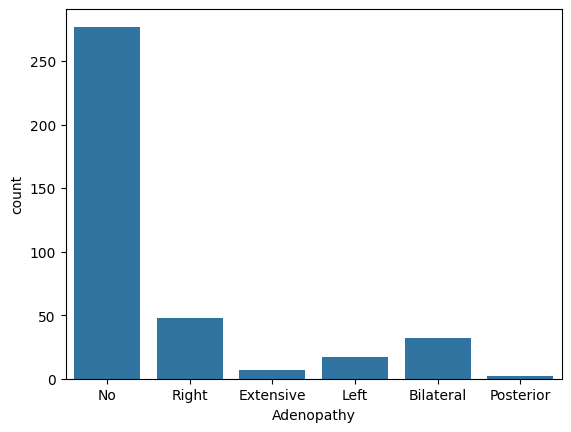

In [18]:
sns.countplot(x='Adenopathy',data=df)


<Axes: xlabel='Adenopathy', ylabel='count'>

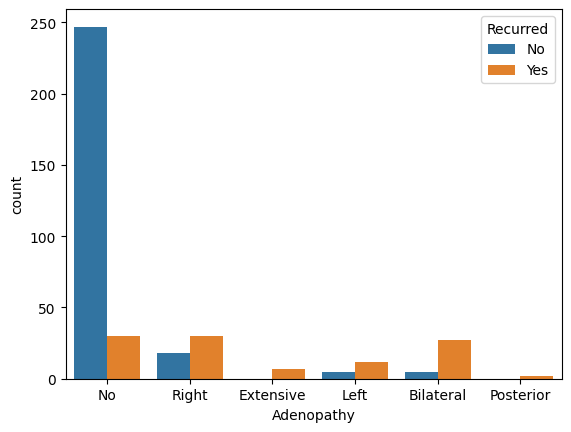

In [19]:
sns.countplot(x='Adenopathy',data=df,hue='Recurred')


Acc to our data if there is extensive adenopathy or posterior adenopathy there is very very high chance of thyroid

<Axes: xlabel='Pathology', ylabel='count'>

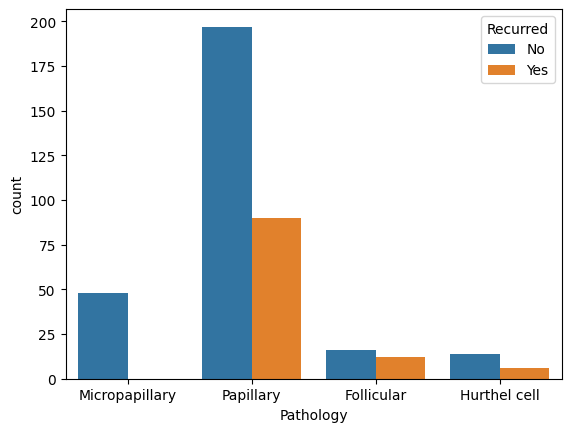

In [20]:
sns.countplot(x='Pathology',data=df,hue='Recurred')


<Axes: xlabel='Focality', ylabel='count'>

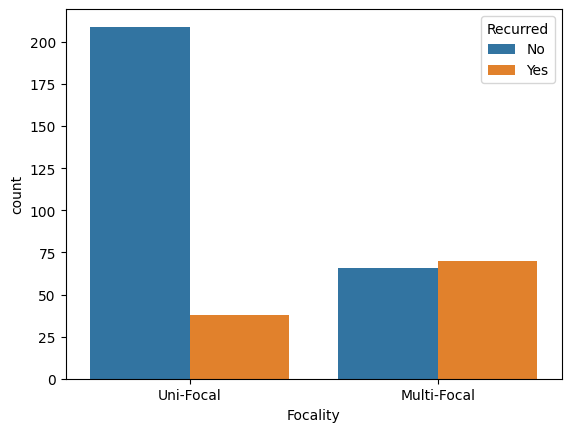

In [21]:
sns.countplot(x='Focality',data=df,hue='Recurred')


<Axes: xlabel='Risk', ylabel='count'>

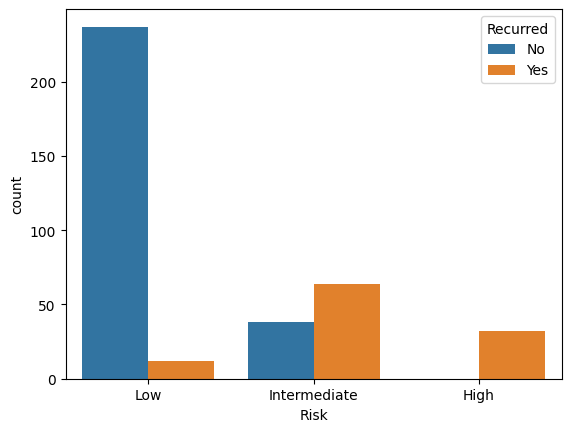

In [22]:
sns.countplot(x='Risk',data=df,hue='Recurred')


<Axes: xlabel='T', ylabel='count'>

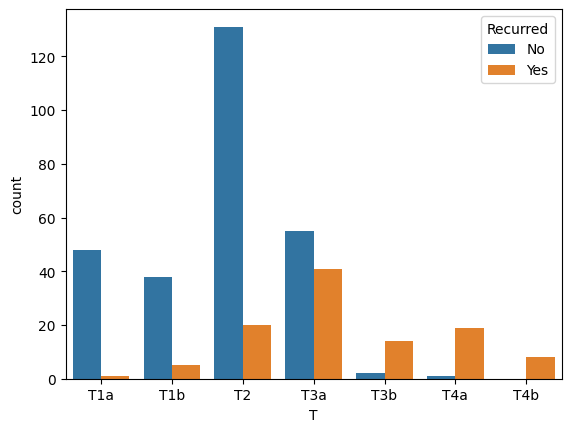

In [23]:
sns.countplot(x='T',data=df,hue='Recurred')


<Axes: xlabel='N', ylabel='count'>

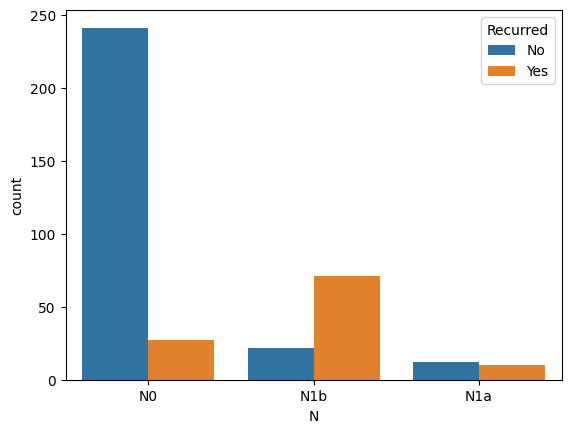

In [24]:
sns.countplot(x='N',data=df,hue='Recurred')


<Axes: xlabel='M', ylabel='count'>

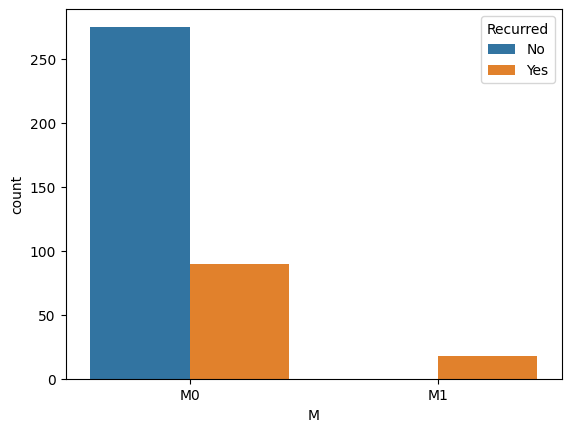

In [25]:
sns.countplot(x='M',data=df,hue='Recurred')


<Axes: xlabel='Stage', ylabel='count'>

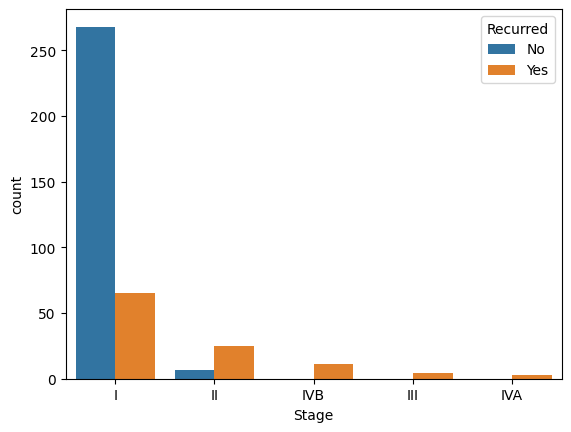

In [26]:
sns.countplot(x='Stage',data=df,hue='Recurred')


<Axes: xlabel='Response', ylabel='count'>

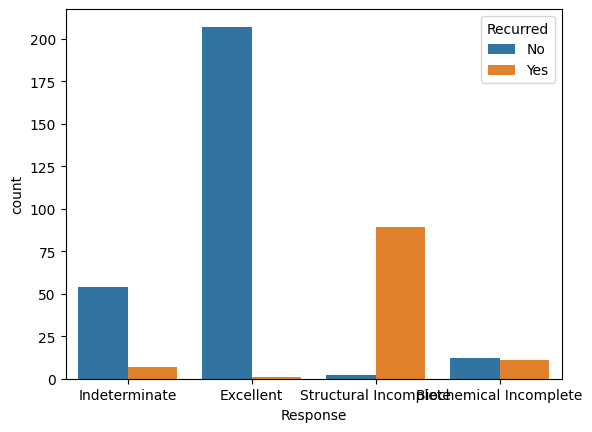

In [27]:
sns.countplot(x='Response',data=df,hue='Recurred')


<Axes: xlabel='Age'>

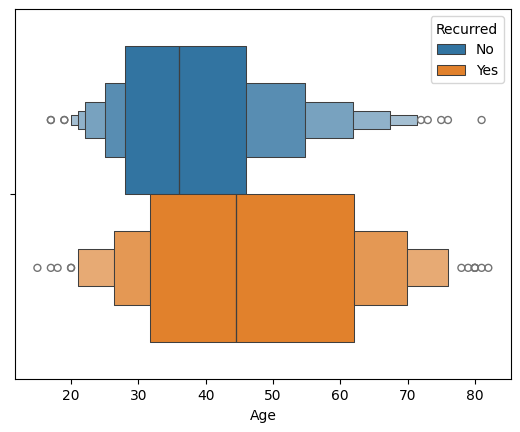

In [28]:
sns.boxenplot(x='Age',data=df,hue='Recurred')

<Axes: xlabel='Recurred', ylabel='count'>

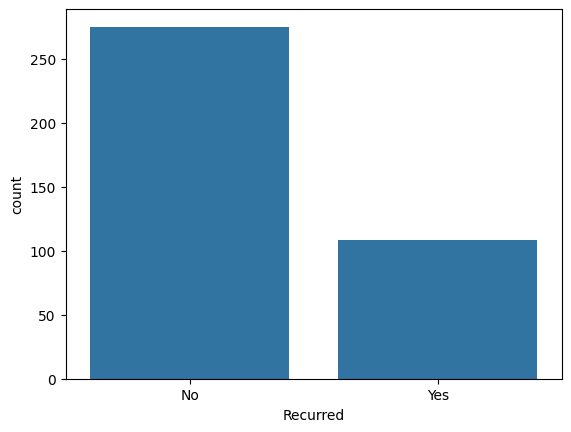

In [29]:
sns.countplot(x='Recurred',data=df)

Pre Processing

In [30]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [31]:
le=LabelEncoder()

In [32]:
cat_cols=['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']

In [33]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [34]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


Now moving ahead with model building

In [35]:
Y=df['Recurred']
X=df.drop('Recurred',axis=1)

In [36]:
X.shape

(383, 16)

In [37]:
Y.shape

(383,)

No feature selection

1. LR

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
lr=LogisticRegression()

In [40]:
lr.fit(X_train,Y_train)

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr_predict_all=lr.predict(X_test)

In [42]:
print(classification_report(Y_test,lr_predict_all))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.88      0.85      0.86        26

    accuracy                           0.91        77
   macro avg       0.90      0.89      0.90        77
weighted avg       0.91      0.91      0.91        77



2. KNN

In [43]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_predict_all=knn.predict(X_test)
print(classification_report(Y_test,knn_predict_all))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        51
           1       1.00      0.50      0.67        26

    accuracy                           0.83        77
   macro avg       0.90      0.75      0.78        77
weighted avg       0.87      0.83      0.81        77



3. Decision Tree

In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_predict_all=knn.predict(X_test)
print(classification_report(Y_test,dtc_predict_all))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        51
           1       1.00      0.50      0.67        26

    accuracy                           0.83        77
   macro avg       0.90      0.75      0.78        77
weighted avg       0.87      0.83      0.81        77



4. Naive Bayes

In [45]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
gnb_predict_all=gnb.predict(X_test)
print(classification_report(Y_test,gnb_predict_all))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.90      0.73      0.81        26

    accuracy                           0.88        77
   macro avg       0.89      0.85      0.86        77
weighted avg       0.89      0.88      0.88        77



5. Random Forest

In [46]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)    
rfc_predict_all=rfc.predict(X_test)
print(classification_report(Y_test,rfc_predict_all))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.96      0.88      0.92        26

    accuracy                           0.95        77
   macro avg       0.95      0.93      0.94        77
weighted avg       0.95      0.95      0.95        77



<h1>random forest performed best without any features selected</h1>

In [47]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [48]:
X_features=X.columns.tolist()

In [49]:
X_features=df[['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']]

In [50]:
Y=df['Recurred']

In [51]:
#using skbest to find the best features
skb=SelectKBest(score_func=chi2,k=10)   #we want 10 best and most important features for our prediction
best_feature_fit=skb.fit(X_features,Y)

In [52]:
#transfroming 
best_feature=best_feature_fit.transform(X_features)

In [53]:
#mapping to see which feature has highest value
feature_score=pd.DataFrame(best_feature_fit.scores_,columns=['Features_Scores'])

In [54]:
features_column_names=pd.DataFrame(X_features.columns,columns=['Feature_name'])
best_fit_df=pd.concat([feature_score,features_column_names],axis=1)

In [55]:
best_fit_df

,Features_Scores,Feature_name
0,143.510002,Age
1,33.604934,Gender
2,37.090915,Smoking
3,6.573165,Hx Smoking
4,11.437056,Hx Radiothreapy
5,0.357936,Thyroid Function
6,4.722485,Physical Examination
7,5.979275,Adenopathy
8,0.001270,Pathology
9,20.030655,Focality


In [56]:
#GET THE BEST 
#THE HIGHER THE NUMBER THE MORE IMPORTANT THE FEATURE
best_fit_df.nlargest(10,'Features_Scores') #selected 10 best features

,Features_Scores,Feature_name
12,206.909723,N
14,189.759689,Stage
0,143.510002,Age
15,102.677741,Response
11,96.849704,T
10,54.262695,Risk
13,45.833333,M
2,37.090915,Smoking
1,33.604934,Gender
9,20.030655,Focality


In [57]:
best_fit_df.nlargest(10,'Features_Scores')['Feature_name'].unique()

array(['N', 'Stage', 'Age', 'Response', 'T', 'Risk', 'M', 'Smoking',
       'Gender', 'Focality'], dtype=object)

In [58]:
df_top_10=df[['N', 'Stage', 'Age', 'Response', 'T', 'Risk', 'M', 'Smoking',
       'Gender', 'Focality','Recurred']]

In [59]:
df_top_10

,N,Stage,Age,Response,T,Risk,M,Smoking,Gender,Focality,Recurred
0,0,0,27,2,0,2,0,0,0,1,0
1,0,0,34,1,0,2,0,0,0,1,0
2,0,0,30,1,0,2,0,0,0,1,0
3,0,0,62,1,0,2,0,0,0,1,0
4,0,0,62,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
378,2,4,72,0,6,0,1,1,1,1,1
379,2,4,81,3,6,0,1,1,1,0,1
380,2,4,72,3,6,0,1,1,1,0,1
381,2,3,61,3,6,0,0,1,1,0,1


In [60]:
Y_top_10=df_top_10['Recurred']
X_top_10=df_top_10.drop('Recurred',axis=1)

In [61]:
X_train_best,X_test_best,Y_train_best,Y_test_best=train_test_split(X_top_10,Y_top_10,test_size=0.2,random_state=0)

LR+ FEATURE SELECTION

In [62]:
lr_b=LogisticRegression()
lr_b.fit(X_train_best,Y_train_best)
lr_predict_b=lr_b.predict(X_test_best)
print(classification_report(Y_test_best,lr_predict_b))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN+ FEATURE SELECTION

In [63]:
knn_b=KNeighborsClassifier()
knn_b.fit(X_train_best,Y_train_best)
knn_predict_b=knn_b.predict(X_test_best)
print(classification_report(Y_test_best,knn_predict_b))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.73      0.84        26

    accuracy                           0.91        77
   macro avg       0.94      0.87      0.89        77
weighted avg       0.92      0.91      0.90        77



DT+FEATURE SELECTION

In [64]:
dtc_b=DecisionTreeClassifier()
dtc_b.fit(X_train_best,Y_train_best)
dtc_predict_b=dtc_b.predict(X_test_best)
print(classification_report(Y_test_best,dtc_predict_b))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.88      0.85      0.86        26

    accuracy                           0.91        77
   macro avg       0.90      0.89      0.90        77
weighted avg       0.91      0.91      0.91        77



NAIVE BAYES+FEATURE SELECTION

In [65]:
gnb_b=GaussianNB()
gnb_b.fit(X_train_best,Y_train_best)
gnb_predict_b=gnb_b.predict(X_test_best)
print(classification_report(Y_test_best,gnb_predict_b))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.90      0.73      0.81        26

    accuracy                           0.88        77
   macro avg       0.89      0.85      0.86        77
weighted avg       0.89      0.88      0.88        77



Random Forest+ Feature Selection

In [66]:
rfc_b=RandomForestClassifier()
rfc_b.fit(X_train_best,Y_train_best)    
rfc_predict_b=rfc_b.predict(X_test_best)
print(classification_report(Y_test_best,rfc_predict_b))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.92      0.88      0.90        26

    accuracy                           0.94        77
   macro avg       0.93      0.92      0.93        77
weighted avg       0.93      0.94      0.93        77



Metrics Graph for models without feature selection

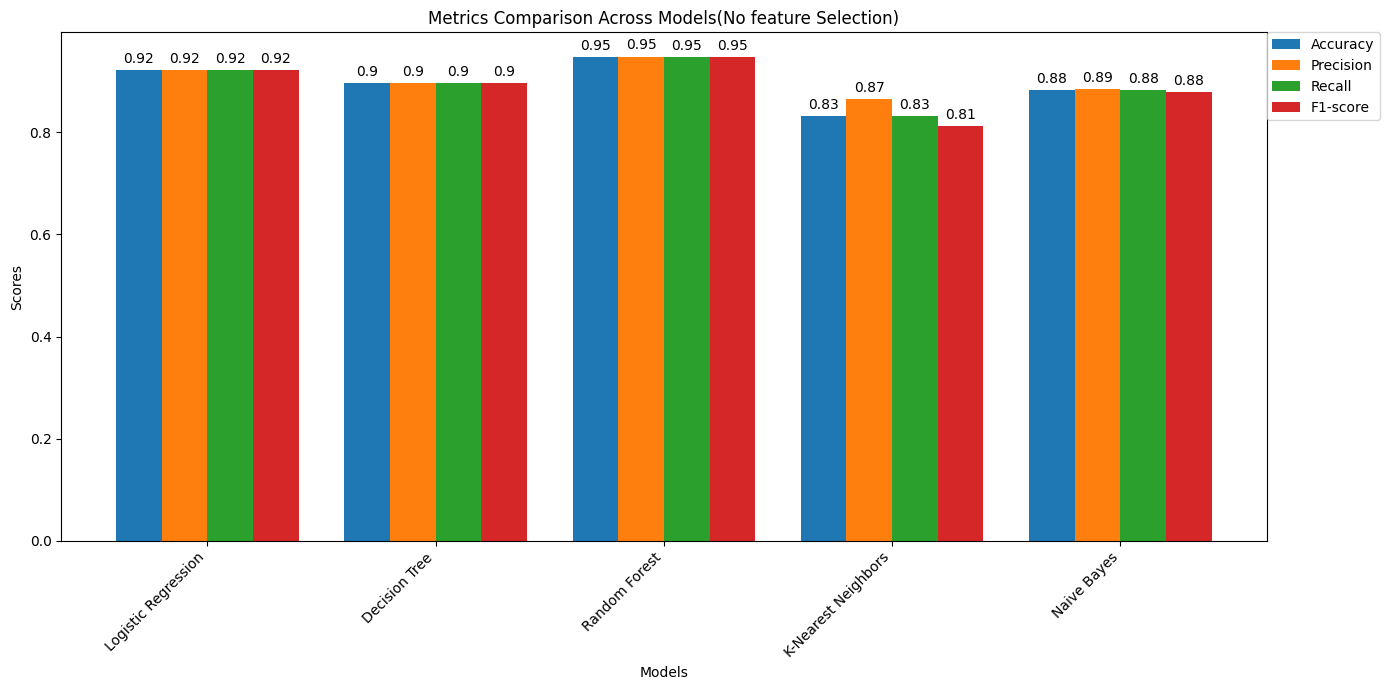

In [67]:

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    report = classification_report(Y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars
gap = 0.3  # the gap between groups of bars

fig, ax = plt.subplots(figsize=(14, 7))

# Adjust positions for each bar group with gap
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models(No feature Selection)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right and place it outside the plot
ax.legend(loc='upper left', borderaxespad=0, bbox_to_anchor=(1.0, 1.0))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

Metrics with feature selection

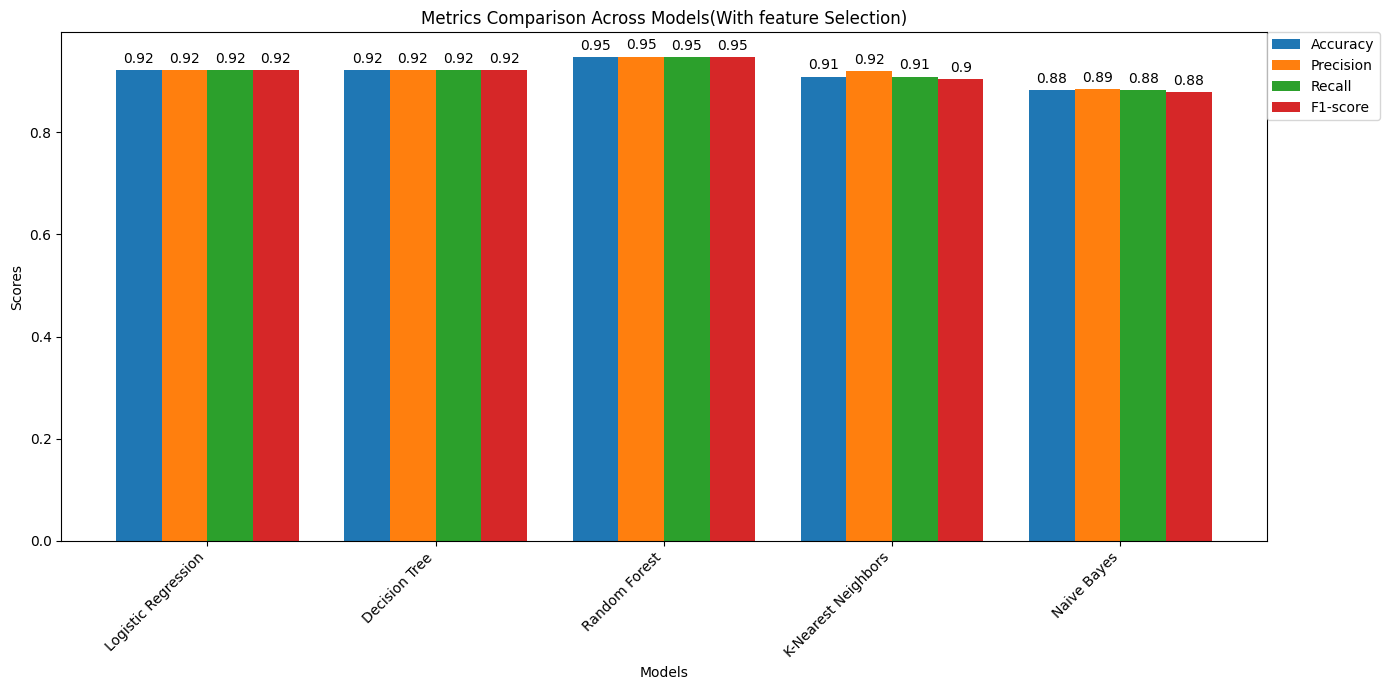

In [68]:

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred_b = model.predict(X_test_best)
    
    # Calculate metrics
    report = classification_report(Y_test_best, y_pred_b, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars
gap = 0.3  # the gap between groups of bars

fig, ax = plt.subplots(figsize=(14, 7))

# Adjust positions for each bar group with gap
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models(With feature Selection)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right and place it outside the plot
ax.legend(loc='upper left', borderaxespad=0, bbox_to_anchor=(1.0, 1.0))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()